### Loan Status problem 

#### Importing Libraries

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

C:\Users\imbha\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\imbha\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True,

### Data Import 

In [2]:
bank_data = pd.read_csv('C:/Users/imbha/Desktop/Teleperformance data set/ML-Exam (1)/Sample-Data.csv')

In [3]:
bank_data.shape

(29503, 106)

In [4]:
bank_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag
0,40000,40000,40000.0,60 months,16.99,993.89,D,D1,Product Regulatory Specialist,< 1 year,...,100.0,12.5,0.0,0.0,137720.0,95327.0,50200.0,84120.0,Cash,N
1,12000,12000,12000.0,60 months,10.42,257.46,B,B3,Ass't Manger,10+ years,...,88.0,75.0,0.0,0.0,33590.0,22017.0,8190.0,3500.0,Cash,N
2,15000,15000,15000.0,36 months,8.90,476.30,A,A5,Project Manager,< 1 year,...,100.0,28.6,0.0,0.0,99814.0,61898.0,28000.0,63414.0,Cash,N
3,15000,15000,15000.0,60 months,16.14,365.89,C,C4,Freight Cordinator,10+ years,...,100.0,33.3,0.0,0.0,54470.0,35867.0,11500.0,42470.0,Cash,N
4,12000,12000,12000.0,36 months,19.42,442.43,D,D3,Loan and Member Services II,5 years,...,100.0,0.0,0.0,0.0,44686.0,25618.0,19300.0,19586.0,Cash,N


In [5]:
bank_data.columns


Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       ...
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies',
       'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit', 'disbursement_method',
       'debt_settlement_flag'],
      dtype='object', length=106)

In [6]:
bank_data.size

3127318

### Define some functions 

In [7]:
# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [8]:
# Create Data audit Report for categorical variables
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [9]:
# Missing value imputation for categorical and continuous variables
def missing_imputation(x, stats = 'mean'):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    else:
        x = x.fillna(x.mode())
    return x

#### data inspection

In [10]:
dict(bank_data.dtypes)

{'loan_amnt': dtype('int64'),
 'funded_amnt': dtype('int64'),
 'funded_amnt_inv': dtype('float64'),
 'term': dtype('O'),
 'int_rate': dtype('float64'),
 'installment': dtype('float64'),
 'grade': dtype('O'),
 'sub_grade': dtype('O'),
 'emp_title': dtype('O'),
 'emp_length': dtype('O'),
 'home_ownership': dtype('O'),
 'annual_inc': dtype('float64'),
 'verification_status': dtype('O'),
 'issue_d': dtype('O'),
 'loan_status': dtype('O'),
 'pymnt_plan': dtype('O'),
 'purpose': dtype('O'),
 'title': dtype('O'),
 'zip_code': dtype('O'),
 'addr_state': dtype('O'),
 'dti': dtype('float64'),
 'delinq_2yrs': dtype('int64'),
 'earliest_cr_line': dtype('O'),
 'inq_last_6mths': dtype('int64'),
 'mths_since_last_delinq': dtype('float64'),
 'mths_since_last_record': dtype('float64'),
 'open_acc': dtype('int64'),
 'pub_rec': dtype('int64'),
 'revol_bal': dtype('int64'),
 'revol_util': dtype('float64'),
 'total_acc': dtype('int64'),
 'initial_list_status': dtype('O'),
 'out_prncp': dtype('float64'),
 '

In [11]:
# separate the categorical and continuous variable names
numeric_var_names = [key for key in dict(bank_data.dtypes) 
                     if dict(bank_data.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names = [key for key in dict(bank_data.dtypes) if dict(bank_data.dtypes)[key] in ['object']]

In [12]:
# print the variable names in both the variables
print(numeric_var_names)
print(cat_var_names)

['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since

In [13]:
#get the dataframe for catagorical variable
bank_data_cat= bank_data[cat_var_names]

In [14]:
# get the dataframe for continuous variables
bank_data_num = bank_data[numeric_var_names]

In [15]:
# get the data audit report for all the continues variables
num_summary = bank_data_num.apply(continuous_var_summary).T

In [16]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
loan_amnt,29503.0,0.0,4.465824e+08,15136.848795,13000.000000,9257.666694,8.570439e+07,1000.00,1500.0000,3200.000,5000.000,8000.000,13000.000000,20000.000000,30000.00000,35000.00000,40000.000000,4.000000e+04
funded_amnt,29503.0,0.0,4.464454e+08,15132.202657,13000.000000,9256.110681,8.567558e+07,1000.00,1500.0000,3200.000,5000.000,8000.000,13000.000000,20000.000000,30000.00000,35000.00000,40000.000000,4.000000e+04
funded_amnt_inv,29503.0,0.0,4.459826e+08,15116.516948,13000.000000,9256.881420,8.568985e+07,0.00,1500.0000,3200.000,4975.000,8000.000,13000.000000,20000.000000,30000.00000,35000.00000,40000.000000,4.000000e+04
int_rate,29503.0,0.0,3.857120e+05,13.073652,12.620000,4.798467,2.302529e+01,5.31,5.3200,6.490,7.340,9.490,12.620000,15.880000,19.42000,21.99000,26.770000,3.099000e+01
installment,29503.0,0.0,1.320837e+07,447.695789,378.150000,268.923150,7.231966e+04,30.12,52.7600,108.641,157.566,250.660,378.150000,599.010000,832.20800,983.83000,1236.370000,1.556750e+03
annual_inc,29503.0,0.0,2.305976e+09,78160.741188,65000.000000,80780.142829,6.525431e+09,0.00,16050.0000,27040.000,34000.000,46446.000,65000.000000,93000.000000,130000.00000,160000.00000,267980.000000,8.253000e+06
dti,29482.0,21.0,5.526257e+05,18.744512,17.810000,12.386052,1.534143e+02,0.00,1.7800,4.960,7.201,11.860,17.810000,24.440000,30.42900,33.74000,42.425700,9.990000e+02
delinq_2yrs,29503.0,0.0,9.076000e+03,0.307630,0.000000,0.860124,7.398126e-01,0.00,0.0000,0.000,0.000,0.000,0.000000,0.000000,1.00000,2.00000,4.000000,1.800000e+01
inq_last_6mths,29503.0,0.0,1.692700e+04,0.573738,0.000000,0.869596,7.561973e-01,0.00,0.0000,0.000,0.000,0.000,0.000000,1.000000,2.00000,2.00000,3.000000,7.000000e+00
mths_since_last_delinq,14300.0,15203.0,4.916900e+05,34.383916,31.000000,21.836092,4.768149e+02,0.00,2.0000,5.000,8.000,16.000,31.000000,50.000000,68.00000,74.00000,80.000000,1.590000e+02


#### data prepration/data cleaning


In [17]:
# Handling Outliers
bank_data_num = bank_data_num.apply(lambda x: x.clip(lower = x.dropna().quantile(0.01), upper = x.quantile(0.99)))

In [18]:
# Handling missings
bank_data_num = bank_data_num.apply(lambda x: missing_imputation(x))

In [19]:
# handeling missing value for catagorical data:
# Handling missings
bank_data_cat = bank_data_cat.apply(lambda x: missing_imputation(x))

### Getting new data frame having data prepared 

In [20]:
bank_data_new= pd.concat([bank_data_num, bank_data_cat], axis = 1)

In [21]:
bank_data_new.shape

(29503, 106)

In [22]:
bank_data_new['loan_status'].value_counts()

Fully Paid     13778
Current        12363
Charged Off     3362
Name: loan_status, dtype: int64

In [23]:
## To check the duplicate data
bank_data_new.duplicated().sum() 

0

In [24]:
# To check now any missing value left
bank_data_new.isnull().sum()

loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
int_rate                           0
installment                        0
annual_inc                         0
dti                                0
delinq_2yrs                        0
inq_last_6mths                     0
mths_since_last_delinq             0
mths_since_last_record             0
open_acc                           0
pub_rec                            0
revol_bal                          0
revol_util                         0
total_acc                          0
out_prncp                          0
out_prncp_inv                      0
total_pymnt                        0
total_pymnt_inv                    0
total_rec_prncp                    0
total_rec_int                      0
total_rec_late_fee                 0
recoveries                         0
collection_recovery_fee            0
last_pymnt_amnt                    0
collections_12_mths_ex_med         0
m

In [25]:
bank_data_new['loan_status'].value_counts()

Fully Paid     13778
Current        12363
Charged Off     3362
Name: loan_status, dtype: int64

In [26]:
##Lable encoding

bank_data_new.replace({"loan_status":{'Fully Paid':0,'Current':1,'Charged Off':2}},inplace=True)

In [27]:
bank_data_new['loan_status'].value_counts()

0    13778
1    12363
2     3362
Name: loan_status, dtype: int64

In [28]:
bank_data_new.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq',
       ...
       'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status',
       'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d',
       'application_type', 'disbursement_method', 'debt_settlement_flag'],
      dtype='object', length=106)

In [29]:
#Deleting Unnnecessary Columns with high missing values
bank_data_new= bank_data_new.drop(['mths_since_last_major_derog','mths_since_last_record','mths_since_last_delinq'],axis=1)

In [30]:
bank_data_new.isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
int_rate                          0
installment                       0
annual_inc                        0
dti                               0
delinq_2yrs                       0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                        0
total_acc                         0
out_prncp                         0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
last_pymnt_amnt                   0
collections_12_mths_ex_med        0
policy_code                       0
acc_now_delinq                    0
tot_coll_amt                

In [31]:
bank_data_new.isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
int_rate                          0
installment                       0
annual_inc                        0
dti                               0
delinq_2yrs                       0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                        0
total_acc                         0
out_prncp                         0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
last_pymnt_amnt                   0
collections_12_mths_ex_med        0
policy_code                       0
acc_now_delinq                    0
tot_coll_amt                

In [32]:
bank_data_new['loan_status'].value_counts()

0    13778
1    12363
2     3362
Name: loan_status, dtype: int64

In [33]:
## delete those rows which are having high null values
bank_data_new= bank_data_new.drop(['next_pymnt_d','title','emp_length','emp_title','last_pymnt_d'],axis=1)

In [34]:
bank_data_new.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
int_rate                      0
installment                   0
annual_inc                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
collections_12_mths_ex_med    0
policy_code                   0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
open_acc_6m                   0
                             ..
num_sats

In [35]:
bank_data_new.dropna(how='any',inplace=True)

In [36]:
bank_data_new['loan_status'].value_counts()

0    13777
1    12363
2     3362
Name: loan_status, dtype: int64

In [37]:
#Deleting Unnnecessary Columns which dont have any impact on target variable i.e loan status
bank_data_new.drop(['funded_amnt_inv'],axis=1) 


,loan_amnt,funded_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,pymnt_plan,purpose,zip_code,addr_state,earliest_cr_line,initial_list_status,last_credit_pull_d,application_type,disbursement_method,debt_settlement_flag
0,40000,40000,16.99,993.89,100000.0,18.8600,0,2,15,0,...,n,debt_consolidation,460xx,IN,Oct-1997,w,Dec-2018,Joint App,Cash,N
1,12000,12000,10.42,257.46,45000.0,19.9700,0,1,14,0,...,n,credit_card,359xx,AL,Aug-1974,f,Feb-2019,Individual,Cash,N
2,15000,15000,8.90,476.30,65000.0,24.1900,0,1,17,0,...,n,debt_consolidation,752xx,TX,Aug-2001,w,Sep-2018,Individual,Cash,N
3,15000,15000,16.14,365.89,42240.0,24.3500,0,0,6,0,...,n,debt_consolidation,958xx,CA,Oct-2006,w,Feb-2019,Joint App,Cash,N
4,12000,12000,19.42,442.43,50500.0,24.4300,0,1,18,0,...,n,other,117xx,NY,Mar-2003,w,Feb-2019,Individual,Cash,N
5,28000,28000,8.90,889.09,140000.0,18.4500,1,2,21,0,...,n,credit_card,927xx,CA,Feb-2000,w,Feb-2019,Individual,Cash,N
6,27975,27975,7.35,558.57,267980.0,6.4200,0,1,16,0,...,n,home_improvement,225xx,VA,Apr-2002,w,Feb-2019,Individual,Cash,N
7,1800,1800,7.35,55.87,130000.0,3.8900,0,0,14,0,...,n,debt_consolidation,956xx,CA,Feb-2007,f,Feb-2019,Individual,Cash,N
8,40000,40000,10.99,1236.37,150000.0,21.7300,0,0,30,0,...,n,debt_consolidation,452xx,OH,May-2004,w,Nov-2017,Individual,Cash,N
9,30000,30000,18.94,777.23,46000.0,19.9100,0,0,14,0,...,n,debt_consolidation,040xx,ME,Oct-2007,w,Feb-2019,Individual,Cash,N


In [38]:
#Checking the unique values from the dataset
bank_data_new['home_ownership'].value_counts()

MORTGAGE    14543
RENT        11655
OWN          3287
ANY            13
NONE            2
OTHER           2
Name: home_ownership, dtype: int64

In [39]:
bank_data_new = bank_data_new[bank_data_new['home_ownership'] != 'NONE']
bank_data_new = bank_data_new[bank_data_new['home_ownership'] != 'ANY']
bank_data_new = bank_data_new[bank_data_new['home_ownership'] != 'OTHER']

bank_data_new['home_ownership'].value_counts()

MORTGAGE    14543
RENT        11655
OWN          3287
Name: home_ownership, dtype: int64

In [40]:
bank_data_new['sub_grade'].value_counts()

B4    1896
C1    1888
B5    1859
C2    1758
C4    1713
B3    1710
B2    1687
C3    1653
B1    1609
A5    1495
C5    1477
A4    1251
A1    1091
D1    1024
A3     953
D2     925
D3     872
A2     855
D4     732
D5     615
E1     431
E2     367
E3     316
E4     293
E5     278
F1     194
F2     126
F3      92
F4      89
F5      69
G1      60
G2      34
G4      29
G3      25
G5      19
Name: sub_grade, dtype: int64

In [41]:
#Deleting Unnnecessary Columns, as there is already grade 
bank_data_new=bank_data_new.drop(['sub_grade'],axis=1)

In [42]:
bank_data_new['term'].value_counts()

 36 months    20882
 60 months     8603
Name: term, dtype: int64

In [43]:
#Some Transformations
bank_data_new['term'] = bank_data_new['term'].astype(str) #Changing the cost to string
bank_data_new['term'] = bank_data_new['term'].apply(lambda x: x.replace('months','')) #Using lambda function to replace ',' from cost
bank_data_new['term'] = bank_data_new['term'].astype(float) # Changing the cost to Float


In [44]:
bank_data_new['term'].value_counts()

36.0    20882
60.0     8603
Name: term, dtype: int64

In [45]:
bank_data_new.verification_status.value_counts()

Source Verified    11488
Not Verified        9661
Verified            8336
Name: verification_status, dtype: int64

In [46]:
#Some Transformations
bank_data_new['verification_status'] = bank_data_new['verification_status'].astype(str) #Changing the cost to string
bank_data_new['verification_status'] = bank_data_new['verification_status'].apply(lambda x: x.replace('Source Verified','Verified')) #Using lambda function to replace ',' from cost

In [47]:
bank_data_new.verification_status.value_counts()

Verified        19824
Not Verified     9661
Name: verification_status, dtype: int64

In [48]:
bank_data_new['pymnt_plan'].value_counts()

n    29485
Name: pymnt_plan, dtype: int64

In [49]:
#Deleting pymnt_plan as this having almost same value for records
bank_data_new=bank_data_new.drop(['pymnt_plan'],axis=1) 


In [50]:
bank_data_new=bank_data_new.drop(['debt_settlement_flag','disbursement_method','addr_state'],axis=1)

In [51]:
bank_data_new=bank_data_new.drop(['purpose'],axis=1)

## Data is bit unbalanced here we can look for Randomforestclassifier because ubalanced data don't affect much decision tree based models

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'm

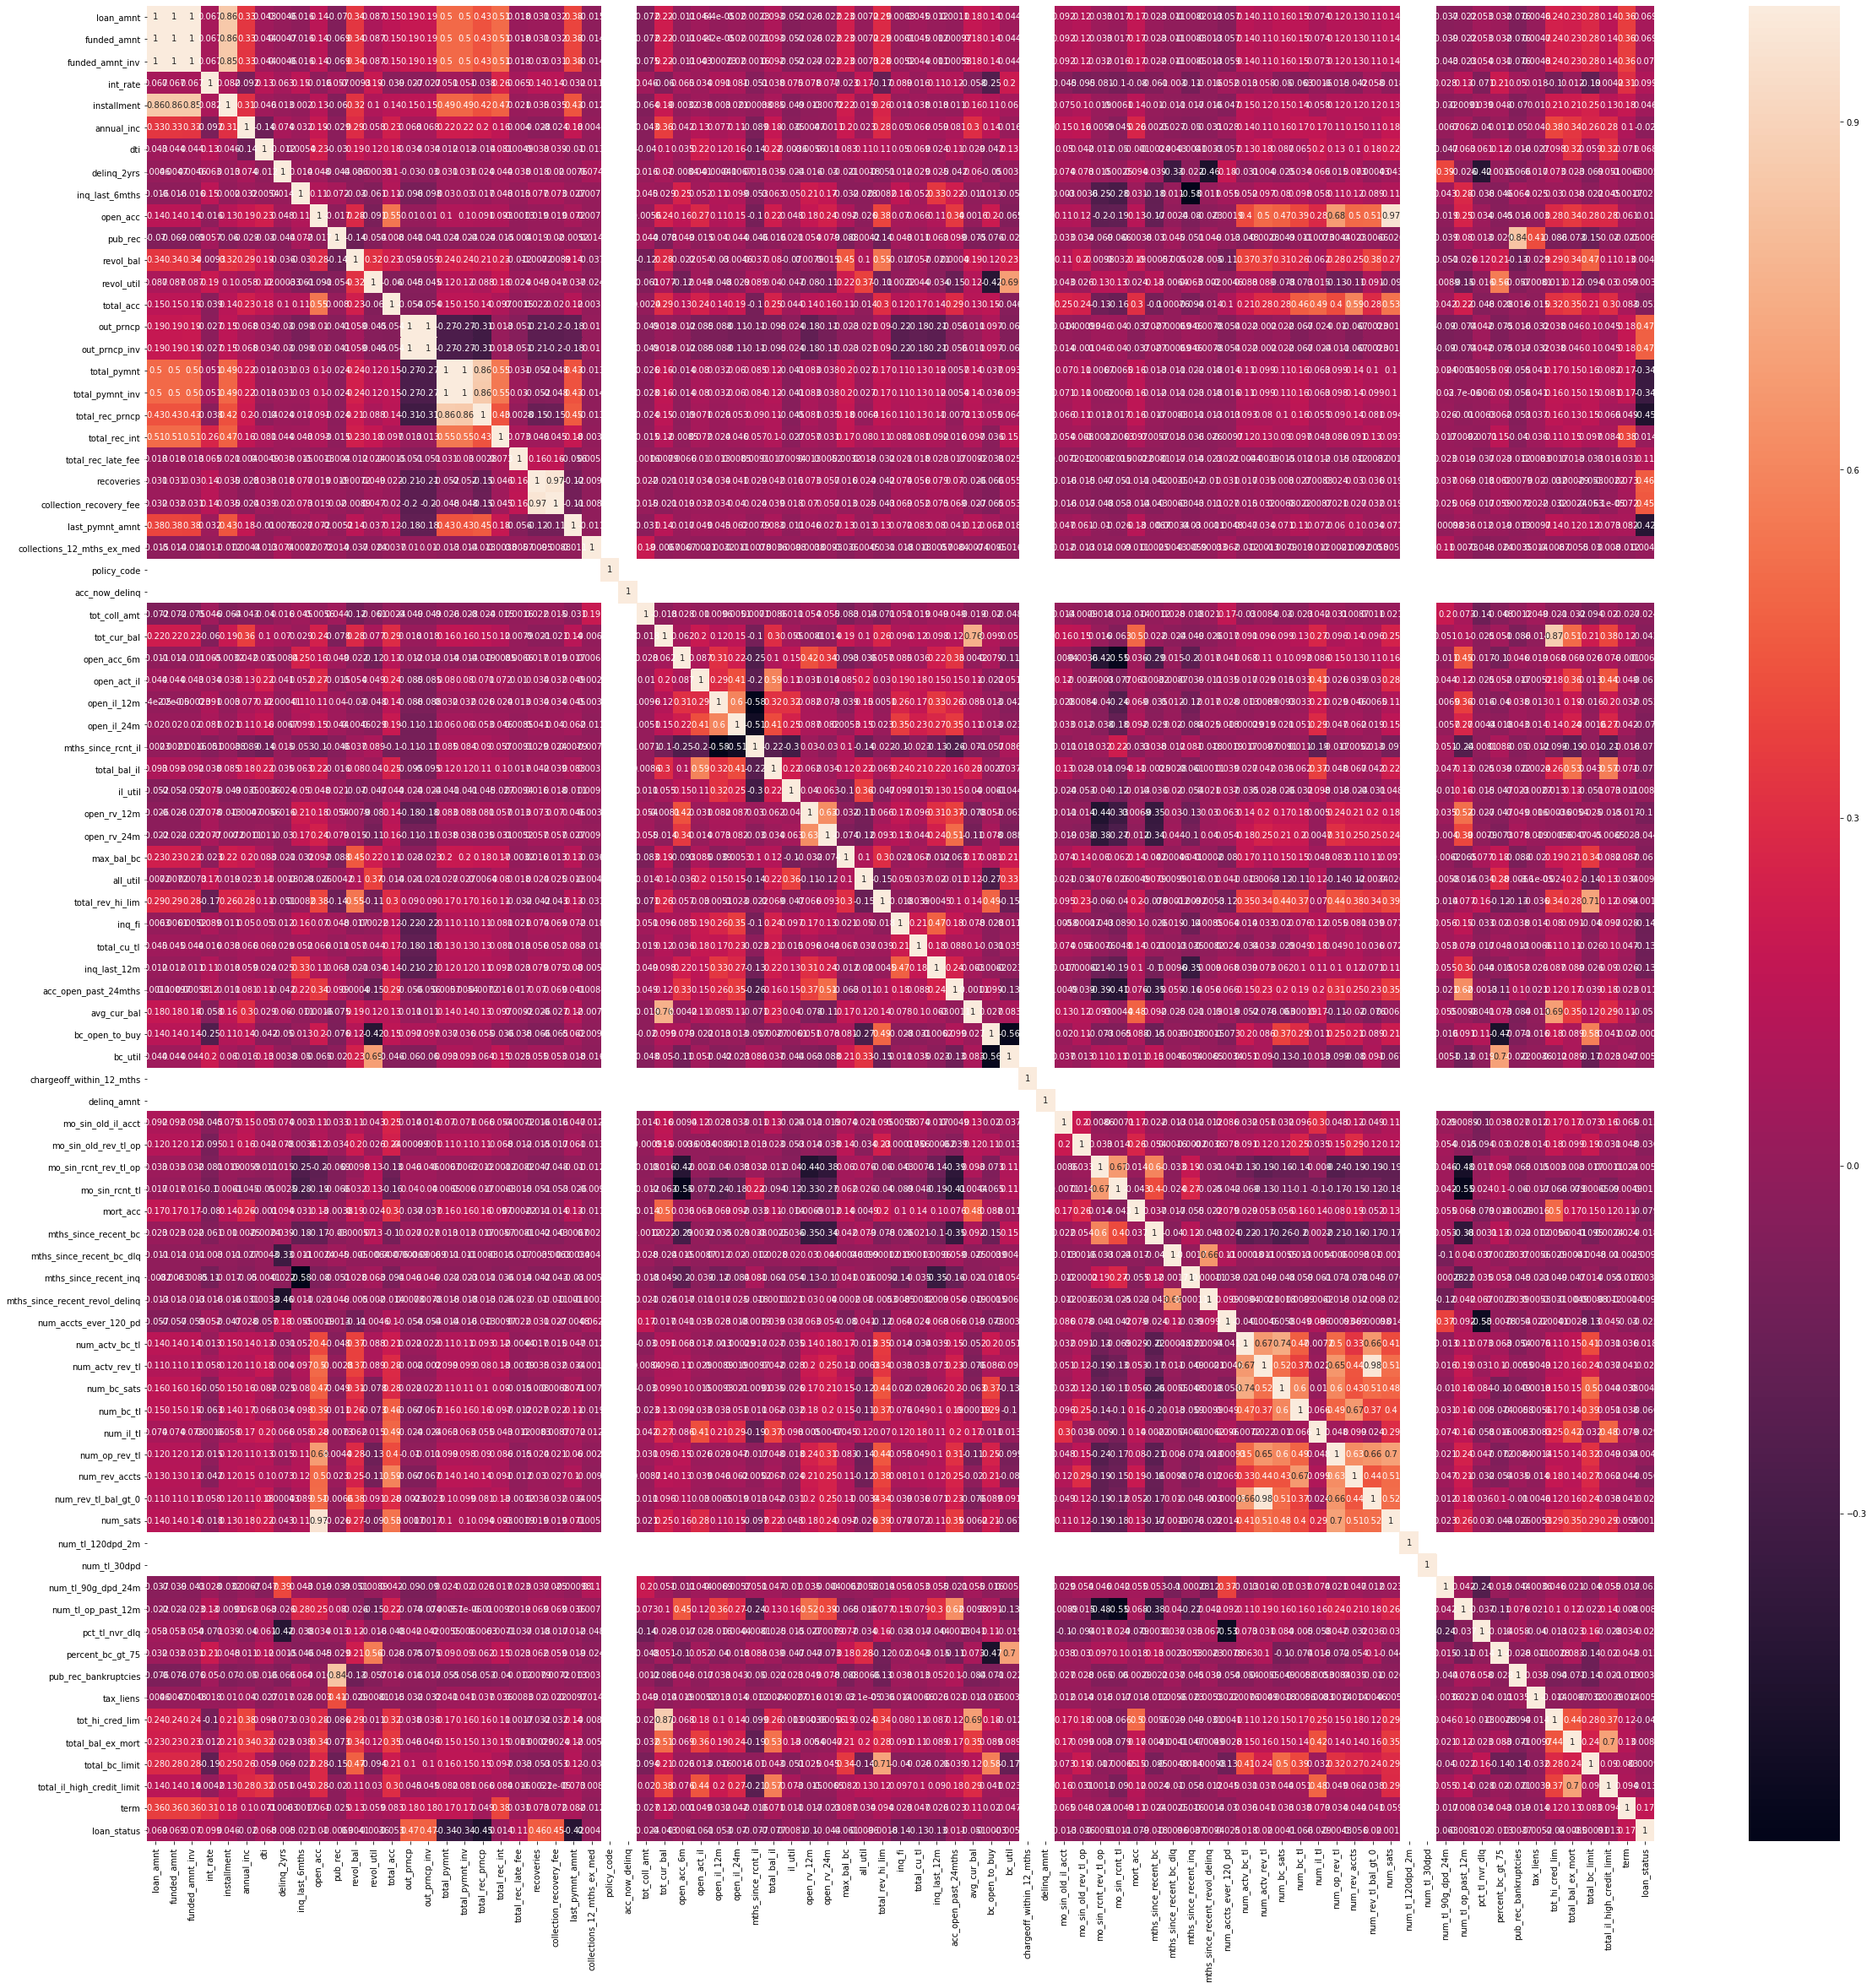

In [52]:
#Get Correlation between different variables
corr = bank_data_new.corr(method='kendall')
plt.figure(figsize=(40,40))
sns.heatmap(corr, annot=True)
bank_data_new.columns

In [53]:
dict(bank_data_new.dtypes)

{'loan_amnt': dtype('int64'),
 'funded_amnt': dtype('int64'),
 'funded_amnt_inv': dtype('float64'),
 'int_rate': dtype('float64'),
 'installment': dtype('float64'),
 'annual_inc': dtype('float64'),
 'dti': dtype('float64'),
 'delinq_2yrs': dtype('int64'),
 'inq_last_6mths': dtype('int64'),
 'open_acc': dtype('int64'),
 'pub_rec': dtype('int64'),
 'revol_bal': dtype('float64'),
 'revol_util': dtype('float64'),
 'total_acc': dtype('int64'),
 'out_prncp': dtype('float64'),
 'out_prncp_inv': dtype('float64'),
 'total_pymnt': dtype('float64'),
 'total_pymnt_inv': dtype('float64'),
 'total_rec_prncp': dtype('float64'),
 'total_rec_int': dtype('float64'),
 'total_rec_late_fee': dtype('float64'),
 'recoveries': dtype('float64'),
 'collection_recovery_fee': dtype('float64'),
 'last_pymnt_amnt': dtype('float64'),
 'collections_12_mths_ex_med': dtype('float64'),
 'policy_code': dtype('int64'),
 'acc_now_delinq': dtype('int64'),
 'tot_coll_amt': dtype('float64'),
 'tot_cur_bal': dtype('float64'),


In [54]:
#Deleting high  Correlated Columns, 
bank_data_new=bank_data_new.drop(['funded_amnt'],axis=1) 


In [55]:
# We need to do the feature scalling now for numerical features
bank_data_new.columns

Index(['loan_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_

In [56]:
#Defining the independent variables and dependent variablesco
x = bank_data_new.drop(['loan_status'],axis=1)
y = bank_data_new['loan_status']


x.shape

(29485, 90)

In [57]:
x.dtypes

loan_amnt                       int64
funded_amnt_inv               float64
int_rate                      float64
installment                   float64
annual_inc                    float64
dti                           float64
delinq_2yrs                     int64
inq_last_6mths                  int64
open_acc                        int64
pub_rec                         int64
revol_bal                     float64
revol_util                    float64
total_acc                       int64
out_prncp                     float64
out_prncp_inv                 float64
total_pymnt                   float64
total_pymnt_inv               float64
total_rec_prncp               float64
total_rec_int                 float64
total_rec_late_fee            float64
recoveries                    float64
collection_recovery_fee       float64
last_pymnt_amnt               float64
collections_12_mths_ex_med    float64
policy_code                     int64
acc_now_delinq                  int64
tot_coll_amt

In [58]:
# An utility function to create dummy variable
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True )
    return df

In [59]:
# get the useful categorical variables
x = x[['grade', 'home_ownership','verification_status','issue_d','zip_code','earliest_cr_line','initial_list_status','last_credit_pull_d','application_type']]

# for c_feature in categorical_features
for c_feature in ['grade', 'home_ownership','verification_status','issue_d','zip_code','earliest_cr_line','initial_list_status','last_credit_pull_d','application_type']:
    x[c_feature] = x[c_feature].astype('category')
    x = create_dummies(x, c_feature)
    
# see the data in the output
x

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_OWN,home_ownership_RENT,verification_status_Verified,issue_d_Apr-2009,...,last_credit_pull_d_Sep-2010,last_credit_pull_d_Sep-2011,last_credit_pull_d_Sep-2012,last_credit_pull_d_Sep-2013,last_credit_pull_d_Sep-2014,last_credit_pull_d_Sep-2015,last_credit_pull_d_Sep-2016,last_credit_pull_d_Sep-2017,last_credit_pull_d_Sep-2018,application_type_Joint App
0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
selector.fit_transform(x)
x.head()

C:\Users\imbha\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_OWN,home_ownership_RENT,verification_status_Verified,issue_d_Apr-2009,...,last_credit_pull_d_Sep-2010,last_credit_pull_d_Sep-2011,last_credit_pull_d_Sep-2012,last_credit_pull_d_Sep-2013,last_credit_pull_d_Sep-2014,last_credit_pull_d_Sep-2015,last_credit_pull_d_Sep-2016,last_credit_pull_d_Sep-2017,last_credit_pull_d_Sep-2018,application_type_Joint App
0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

num_cols= ['loan_amnt', 'term', 'int_rate', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med',
        'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim']


# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scaletrain = StandardScaler().fit(bank_data_new[[i]])

    

        
  

In [62]:
bank_data_new.head()
bank_data_new.shape

(29485, 91)

In [63]:
bank_data_new.columns

Index(['loan_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_

In [65]:
# to identify the highlly correaled features.
def correlation(data, limit):
    col_corr= set()
    corr_matrix=bank_data_new.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > limit:
                colname= corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr          

In [66]:
corr_feature =correlation(bank_data_new, 0.4)
corr_feature

{'acc_open_past_24mths',
 'all_util',
 'annual_inc',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'collection_recovery_fee',
 'funded_amnt_inv',
 'inq_fi',
 'inq_last_12m',
 'installment',
 'last_pymnt_amnt',
 'loan_status',
 'max_bal_bc',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_rcnt_il',
 'mths_since_recent_bc',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'open_act_il',
 'open_il_24m',
 'open_rv_12m',
 'open_rv_24m',
 'out_prncp',
 'out_prncp_inv',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'pub_rec_bankruptcies',
 'revol_bal',
 'tax_liens',
 'term',
 'tot_cur_bal',
 'tot_hi_cred_lim',
 'total_acc',
 'total_bal_ex_mort',
 'total_bal_il',
 'total_bc_limit',
 'total_il_high_credit_limit',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_int

In [67]:
type(corr_feature)

set

In [68]:
corr_feature.remove('loan_status') ## This is our target variable we need to contain this feature

In [69]:
corr_feature

{'acc_open_past_24mths',
 'all_util',
 'annual_inc',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'collection_recovery_fee',
 'funded_amnt_inv',
 'inq_fi',
 'inq_last_12m',
 'installment',
 'last_pymnt_amnt',
 'max_bal_bc',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_rcnt_il',
 'mths_since_recent_bc',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'open_act_il',
 'open_il_24m',
 'open_rv_12m',
 'open_rv_24m',
 'out_prncp',
 'out_prncp_inv',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'pub_rec_bankruptcies',
 'revol_bal',
 'tax_liens',
 'term',
 'tot_cur_bal',
 'tot_hi_cred_lim',
 'total_acc',
 'total_bal_ex_mort',
 'total_bal_il',
 'total_bc_limit',
 'total_il_high_credit_limit',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_int',
 'total_rec_p

In [70]:
#Deleting high  Correlated Columns, 
bank_data_new=bank_data_new.drop(corr_feature,axis=1) 

In [71]:
bank_data_new.shape

(29485, 36)

In [72]:
bank_data_new.dtypes

loan_amnt                       int64
int_rate                      float64
dti                           float64
delinq_2yrs                     int64
inq_last_6mths                  int64
open_acc                        int64
pub_rec                         int64
revol_util                    float64
total_rec_late_fee            float64
recoveries                    float64
collections_12_mths_ex_med    float64
policy_code                     int64
acc_now_delinq                  int64
tot_coll_amt                  float64
open_acc_6m                   float64
open_il_12m                   float64
il_util                       float64
total_cu_tl                   float64
chargeoff_within_12_mths      float64
delinq_amnt                     int64
mo_sin_old_il_acct            float64
mo_sin_old_rev_tl_op          float64
mths_since_recent_bc_dlq      float64
num_accts_ever_120_pd         float64
num_tl_120dpd_2m              float64
num_tl_30dpd                  float64
grade       

In [73]:
## To avoid the dummy valriable creation issue
bank_data_new= bank_data_new.drop(['application_type','last_credit_pull_d','initial_list_status','earliest_cr_line','zip_code','issue_d','verification_status','home_ownership','grade'],axis=1)

In [74]:
#Defining the independent variables and dependent variablesco
x = bank_data_new.drop(['loan_status'],axis=1)
y = bank_data_new['loan_status']

x.head()

,loan_amnt,int_rate,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,total_rec_late_fee,recoveries,...,il_util,total_cu_tl,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mths_since_recent_bc_dlq,num_accts_ever_120_pd,num_tl_120dpd_2m,num_tl_30dpd
0,40000,16.99,18.86,0,2,15,0,40.3,0.0,0.0,...,88.000000,0.000000,0.0,0,157.0,231.0,39.155986,0.0,0.0,0.0
1,12000,10.42,19.97,0,1,14,0,59.0,0.0,0.0,...,92.000000,1.000000,0.0,0,278.0,483.0,67.000000,0.0,0.0,0.0
2,15000,8.90,24.19,0,1,17,0,29.3,0.0,0.0,...,69.019004,1.399358,0.0,0,145.0,146.0,39.155986,0.0,0.0,0.0
3,15000,16.14,24.35,0,0,6,0,67.3,0.0,0.0,...,65.000000,3.000000,0.0,0,136.0,143.0,39.155986,0.0,0.0,0.0
4,12000,19.42,24.43,0,1,18,0,35.8,0.0,0.0,...,85.000000,5.000000,0.0,0,38.0,181.0,39.155986,0.0,0.0,0.0


### deviding data into training and testing

In [75]:
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.5,random_state=353)
x_train.head()

,loan_amnt,int_rate,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,total_rec_late_fee,recoveries,...,il_util,total_cu_tl,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mths_since_recent_bc_dlq,num_accts_ever_120_pd,num_tl_120dpd_2m,num_tl_30dpd
26498,10000,7.62,11.4600,1,0,11,0,14.7,0.0,0.0,...,69.019004,1.399358,0.0,0,138.0,199.0,39.155986,0.0,0.0,0.0
28751,22000,14.47,9.0400,0,0,20,0,36.7,0.0,0.0,...,89.000000,4.000000,0.0,0,94.0,77.0,39.155986,0.0,0.0,0.0
26173,3000,10.49,31.4900,0,0,10,0,20.3,0.0,0.0,...,84.000000,0.000000,0.0,0,131.0,144.0,39.155986,0.0,0.0,0.0
7178,8000,11.55,42.4257,2,0,9,0,32.2,0.0,0.0,...,60.000000,0.000000,0.0,0,150.0,153.0,39.155986,1.0,0.0,0.0
4096,35000,7.56,14.5200,0,0,6,0,53.5,0.0,0.0,...,69.019004,0.000000,0.0,0,40.0,215.0,39.155986,0.0,0.0,0.0


In [76]:
x_train.dtypes

loan_amnt                       int64
int_rate                      float64
dti                           float64
delinq_2yrs                     int64
inq_last_6mths                  int64
open_acc                        int64
pub_rec                         int64
revol_util                    float64
total_rec_late_fee            float64
recoveries                    float64
collections_12_mths_ex_med    float64
policy_code                     int64
acc_now_delinq                  int64
tot_coll_amt                  float64
open_acc_6m                   float64
open_il_12m                   float64
il_util                       float64
total_cu_tl                   float64
chargeoff_within_12_mths      float64
delinq_amnt                     int64
mo_sin_old_il_acct            float64
mo_sin_old_rev_tl_op          float64
mths_since_recent_bc_dlq      float64
num_accts_ever_120_pd         float64
num_tl_120dpd_2m              float64
num_tl_30dpd                  float64
dtype: objec

In [77]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_train,y_train)



C:\Users\imbha\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:32: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
C:\Users\imbha\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:32: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_s

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [78]:
y_pred = classifier.predict(x_test)

#best_grid = grid_search.best_estimator_
#grid_accuracy = evaluate(best_grid, x_test, y_test)

C:\Users\imbha\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


### Confusion matrix

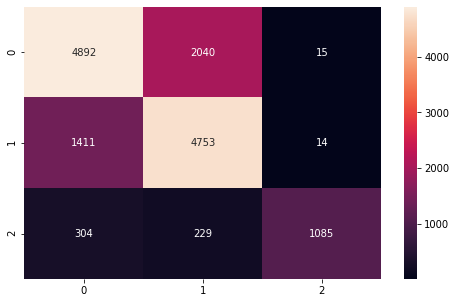

In [79]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data=cm)
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d');


In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.70      0.72      6947
           1       0.68      0.77      0.72      6178
           2       0.97      0.67      0.79      1618

    accuracy                           0.73     14743
   macro avg       0.80      0.71      0.75     14743
weighted avg       0.74      0.73      0.73     14743



In [81]:
loan_status = pd.DataFrame(y_pred)

In [82]:
results = pd.concat([bank_data_new['loan_status'],loan_status],axis=1)

In [83]:
type(results)

pandas.core.frame.DataFrame

In [84]:
results.columns=['loan_status_o','loan_status']

In [85]:
results.head()

,loan_status_o,loan_status
0,0.0,1.0
1,1.0,0.0
2,0.0,0.0
3,1.0,1.0
4,1.0,2.0


In [86]:
results.to_csv('./loan_status.csv',index=False)

In [87]:
results['loan_status'].value_counts() 

1.0    7022
0.0    6607
2.0    1114
Name: loan_status, dtype: int64

#### By tuning the Hyperparameter we can get the best Hyperparameter for random forest classifier and this can also improve the performance of the model

In [88]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [80],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4 ],
    'min_samples_split': [8, 10],
    'n_estimators': [100]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = classifier, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)

In [89]:
from sklearn.model_selection import cross_val_score
grdSearchCvclassifier = RandomForestClassifier(n_estimators=100, max_depth=80,min_samples_split=10, max_features=3,min_samples_leaf=4,random_state=0)
#classifier.fit(x_train,y_train)

scores = cross_val_score(grdSearchCvclassifier, x_train, y_train, cv=5)
scores.mean()


C:\Users\imbha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
C:\Users\imbha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review

C:\Users\imbha\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\imbha\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

C:\Users\imbha\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\imbha\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

C:\Users\imbha\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\imbha\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

C:\Users\imbha\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\imbha\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

C:\Users\imbha\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\imbha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:489: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link fo

C:\Users\imbha\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\imbha\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

C:\Users\imbha\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\imbha\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

C:\Users\imbha\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\imbha\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

C:\Users\imbha\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\imbha\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

C:\Users\imbha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:489: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
C:\Users\imbha\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curr

C:\Users\imbha\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\imbha\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

C:\Users\imbha\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\imbha\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

C:\Users\imbha\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\imbha\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

C:\Users\imbha\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\imbha\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

C:\Users\imbha\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\imbha\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

C:\Users\imbha\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\imbha\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

C:\Users\imbha\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\imbha\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

C:\Users\imbha\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\imbha\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

C:\Users\imbha\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\imbha\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

C:\Users\imbha\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\imbha\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

C:\Users\imbha\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\imbha\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

C:\Users\imbha\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\imbha\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

C:\Users\imbha\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\imbha\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

C:\Users\imbha\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\imbha\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

C:\Users\imbha\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


0.7635313575274207

This can be imporoved by appliying other hyper parameter tuning concepts, 